# Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preprocessing

In [3]:
df = pd.read_csv('merged_dataset.csv')
df

,mean_1,standard_deviation_1,median_1,min_value_1,max_value_1,range_1,interquartile_range_1,q1_1,q3_1,kurtosis_1,...,max_value_2,range_2,interquartile_range_2,q1_2,q3_2,kurtosis_2,skewness_2,station_2,channel_2,class_2
0,-10087.594937,1095.953766,-10445.0,-14409,-7321,7088,1950.00,-10895.0,-8945.00,-0.844598,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
1,-8315.313791,1203.245256,-8298.0,-14163,-2830,11333,771.00,-8675.0,-7904.00,6.035557,...,7978.0,18472.0,1331.0,-702.0,629.0,4.808834,-0.082384,MEPAS,HHZ,BEBENG
2,-11952.875455,1373.377233,-11634.5,-18896,-7042,11854,1283.25,-12461.0,-11177.75,3.624293,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
3,-12356.716855,1779.579821,-12849.0,-16766,-5367,11399,2072.00,-13566.0,-11494.00,1.122037,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
4,-10712.443704,1240.537369,-10833.0,-15870,-4034,11836,1215.00,-11395.0,-10180.00,3.125415,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,310.812791,3725.247662,395.0,-16810,14033,30843,3997.00,-1665.0,2332.00,1.618849,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
816,-118.743504,10286.564361,5.0,-33741,47380,81121,13502.00,-6939.0,6563.00,0.447013,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
817,-236.231179,16593.166954,-404.0,-77335,67937,145272,10074.00,-5011.0,5063.00,4.286426,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
818,724.815456,6119.723563,461.0,-26119,35465,61584,5905.00,-2383.0,3522.00,4.478436,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Assuming merged_df is your DataFrame
# Separate features and labels
X = df.drop(['class_1', 'class_2', 'station_1', 'station_2', 'channel_1', 'channel_2'], axis=1)
y = df['class_1']

# Label encoding for the target label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [5]:
print("========================SEBELUM SMOTE========================== \n")

# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

# Menampilkan jumlah data untuk setiap kelas
print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")
    
print("========================SESUDAH SMOTE========================== \n")
# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test
train_class_counts = pd.Series(y_train_smote).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")  
    


========================SEBELUM SMOTE========================== 

Data Latih:
BEBENG = 519 data
GENDOL = 28 data
BOYONG = 27 data

Data Uji:
BEBENG = 222 data
GENDOL = 12 data
BOYONG = 12 data
========================SESUDAH SMOTE========================== 

Data Latih:
BEBENG = 519 data
BOYONG = 519 data
GENDOL = 519 data

Data Uji:
BEBENG = 222 data
GENDOL = 12 data
BOYONG = 12 data


In [9]:
from imblearn.over_sampling import SMOTE

print("========================SEBELUM SMOTE========================== \n")

# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

# Menampilkan jumlah data untuk setiap kelas
print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

# Menggunakan SMOTE untuk menambah data testing
smote = SMOTE(random_state=42)

# Hanya melakukan oversampling pada data uji
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print("========================SESUDAH SMOTE========================== \n")
# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test setelah SMOTE
train_class_counts = pd.Series(y_train_smote).value_counts()
test_class_counts = pd.Series(y_test_smote).value_counts()

print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")


========================SEBELUM SMOTE========================== 

Data Latih:
BEBENG = 519 data
GENDOL = 28 data
BOYONG = 27 data

Data Uji:
BEBENG = 222 data
GENDOL = 12 data
BOYONG = 12 data
========================SESUDAH SMOTE========================== 

Data Latih:
BEBENG = 519 data
BOYONG = 519 data
GENDOL = 519 data

Data Uji:
BEBENG = 222 data
GENDOL = 222 data
BOYONG = 222 data


In [10]:
class_names = df['class_1'].unique()

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai K yang ingin dieksplorasi
param_dist = {
    'n_neighbors': range(1, 28),
    'leaf_size': range(20, 60),
    'p' : [2]
}
  # Contoh: kita ingin mencoba nilai K dari 1 hingga 20

# Inisialisasi objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)

# Latih model menggunakan Random Search
random_search.fit(X_train_smote, y_train_smote)

# Tampilkan hasil pencarian parameter
print("Best parameter (K):", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluasi model terbaik pada data uji
best_knn_model = random_search.best_estimator_
y_pred = best_knn_model.predict(X_test_smote)

# Tampilkan laporan klasifikasi
print(classification_report(y_test_smote, y_pred, target_names=class_names))


Best parameter (K): {'p': 2, 'n_neighbors': 1, 'leaf_size': 51}
Best cross-validation score: 0.9839434810533075
              precision    recall  f1-score   support

      BEBENG       0.79      0.97      0.87       222
      BOYONG       0.96      0.75      0.84       222
      GENDOL       1.00      1.00      1.00       222

    accuracy                           0.91       666
   macro avg       0.92      0.91      0.90       666
weighted avg       0.92      0.91      0.90       666



        BEBENG  BOYONG  GENDOL  Precision    Recall
BEBENG     215       7       0   0.793358  0.968468
BOYONG      56     166       0   0.959538  0.747748
GENDOL       0       0     222   1.000000  1.000000


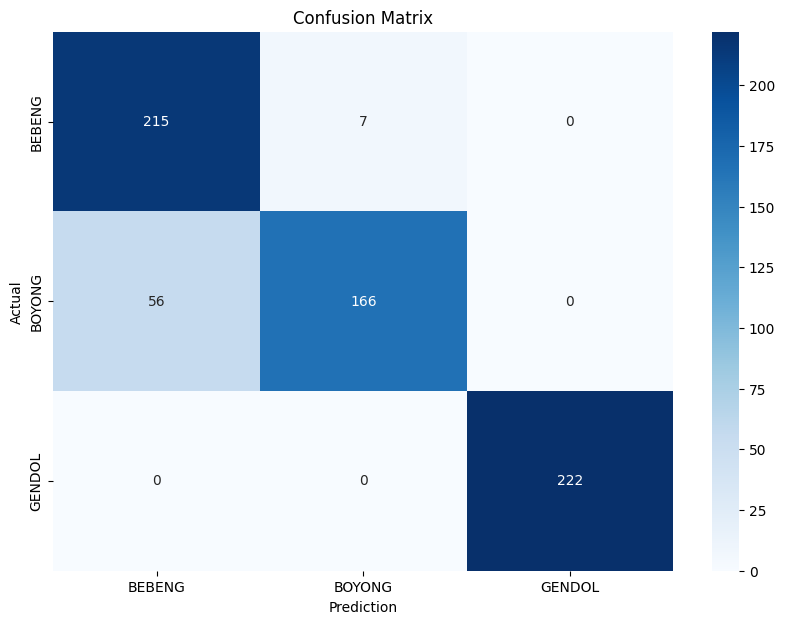

Accuracy: 90.54%


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Buat confusion matrix
cm = confusion_matrix(y_test_smote, y_pred, labels=[0, 1, 2])  # Asumsikan label 0: Bebeng, 1: Boyong, 2: Gendol
accuracy = accuracy_score(y_test_smote, y_pred)

# Hitung Precision dan Recall dari laporan klasifikasi
report = classification_report(y_test_smote, y_pred, target_names=class_names, output_dict=True)

# Buat DataFrame untuk Confusion Matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Tambahkan baris untuk Precision dan Recall
cm_df['Precision'] = [report['BEBENG']['precision'], report['BOYONG']['precision'], report['GENDOL']['precision']]
cm_df['Recall'] = [report['BEBENG']['recall'], report['BOYONG']['recall'], report['GENDOL']['recall']]

# Tampilkan Confusion Matrix dengan Precision dan Recall
print(cm_df)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Cetak akurasi
print(f"Accuracy: {accuracy * 100:.2f}%")


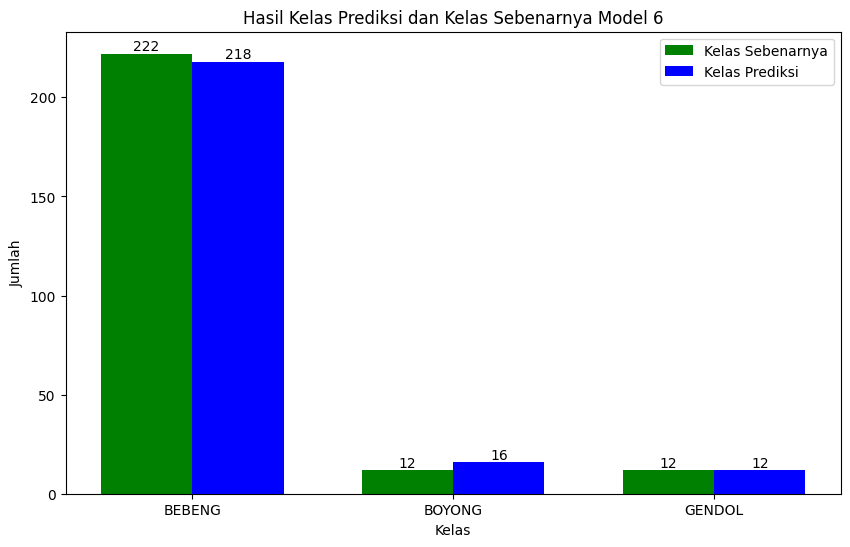

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung jumlah prediksi untuk setiap kelas
unique_labels = np.unique(y_test)
true_counts = np.bincount(y_test)
pred_counts = np.bincount(y_pred, minlength=len(true_counts))

# Pastikan jumlah prediksi dan data sebenarnya memiliki panjang yang sama
if len(pred_counts) < len(true_counts):
    pred_counts = np.concatenate([pred_counts, np.zeros(len(true_counts) - len(pred_counts))])

# Tentukan posisi pada sumbu x untuk setiap bar
x = np.arange(len(unique_labels))

# Lebar bar
width = 0.35

# Buat bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, true_counts, width, label='Kelas Sebenarnya', color='green')
bars2 = plt.bar(x + width/2, pred_counts, width, label='Kelas Prediksi', color='blue')

# Tambahkan label, judul, dan legend
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Hasil Kelas Prediksi dan Kelas Sebenarnya Model 6')
plt.xticks(x, class_names)
plt.legend()

# Tambahkan label jumlah di atas setiap bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height),
                 ha='center', va='bottom')

# Tampilkan plot
plt.show()


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai K yang ingin dieksplorasi
param_dist = {
    'n_neighbors': range(1, 28),
    'leaf_size': range(20, 60),
    'p' : [2]
}
  # Contoh: kita ingin mencoba nilai K dari 1 hingga 20

# Inisialisasi objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Latih model menggunakan Random Search
random_search.fit(X_train_smote, y_train_smote)

# Tampilkan hasil pencarian parameter
print("Best parameter (K):", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluasi model terbaik pada data uji
best_knn_model = random_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=class_names))


Best parameter (K): {'p': 2, 'n_neighbors': 1, 'leaf_size': 51}
Best cross-validation score: 0.983931074284772
              precision    recall  f1-score   support

      BEBENG       0.99      0.97      0.98       222
      BOYONG       0.56      0.75      0.64        12
      GENDOL       1.00      1.00      1.00        12

    accuracy                           0.96       246
   macro avg       0.85      0.91      0.87       246
weighted avg       0.97      0.96      0.96       246



In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai K yang ingin dieksplorasi
param_dist = {
    'n_neighbors': range(1, 28),
    'leaf_size': range(20, 60),
    'p' : [2]
}
  # Contoh: kita ingin mencoba nilai K dari 1 hingga 20

# Inisialisasi objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', random_state=42)

# Latih model menggunakan Random Search
random_search.fit(X_train_smote, y_train_smote)

# Tampilkan hasil pencarian parameter
print("Best parameter (K):", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluasi model terbaik pada data uji
best_knn_model = random_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=class_names))


Best parameter (K): {'p': 2, 'n_neighbors': 1, 'leaf_size': 51}
Best cross-validation score: 0.9884367245657568
              precision    recall  f1-score   support

      BEBENG       0.99      0.97      0.98       222
      BOYONG       0.56      0.75      0.64        12
      GENDOL       1.00      1.00      1.00        12

    accuracy                           0.96       246
   macro avg       0.85      0.91      0.87       246
weighted avg       0.97      0.96      0.96       246

